# Setup Colab
Here we setup Colab, and import some useful packages.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/CIVE 6358/Assignment 1")

Mounted at /content/gdrive


In [4]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
from data_process import get_CIFAR10_data
import math
from scipy.spatial import distance
from models import Perceptron, Softmax
from kaggle_submission import output_submission_csv
%matplotlib inline

# Loading CIFAR-10

In the following cells we determine the number of images for each split and load the images.

In [ ]:
# You can change these numbers for experimentation
# For submission we will use the default values
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 5000  # Keep this default as 5000 for your submission

In [ ]:
data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

Convert the sets of images from dimensions of **(N, 3, 32, 32) -> (N, 3072)** where N is the number of images so that each **3x32x32** image is represented by a single vector.

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [ ]:
def get_acc(pred, y_test):
  return np.sum(y_test==pred)/len(y_test)*100

# Perceptron

Perceptron has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according the perceptron update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Perceptron classifier in the **models/Perceptron.py**. You may directly edit it by open it from the Files icon located on the left sidebar.

The following code:
- Creates an instance of the Perceptron classifier class
- The train function of the Perceptron class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy


### Train Perceptron

Alpha:0.001, Epoch:10, Decay:True


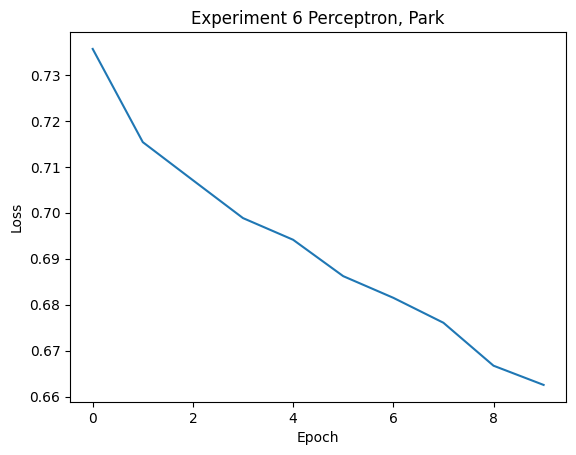

In [ ]:
experiment = 6
alpha = 0.001
epoch = 10
decay = True

percept_ = Perceptron(alpha, epoch, decay)
losses, val_acc, test_acc = percept_.train(X_train, y_train, X_val, y_val, X_test, y_test)
sns.lineplot(data=losses).set(title=f'Experiment {experiment} Perceptron, Park', xlabel='Epoch', ylabel='Loss')
print(f'Alpha:{alpha}, Epoch:{epoch}, Decay:{decay}')

[Text(0.5, 1.0, 'Experiment 6 Perceptron, Park'),
 Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Accuracy (%)')]

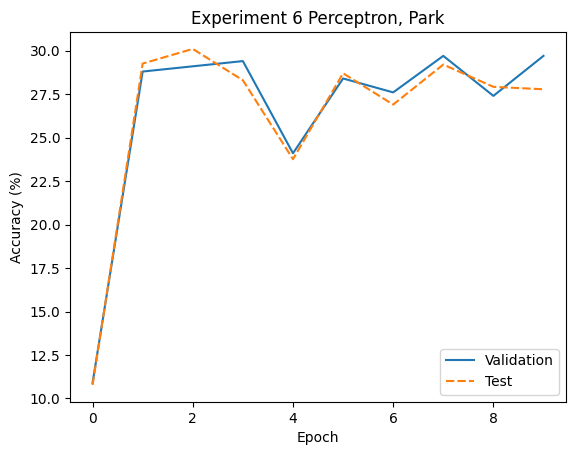

In [ ]:
sns.lineplot(data=pd.DataFrame({'Validation': val_acc, 'Test': test_acc})).set(title=f'Experiment {experiment} Perceptron, Park', xlabel='Epoch', ylabel='Accuracy (%)')

In [ ]:
pred_percept = percept_.predict(X_train)
print('The training accuracy is given by : %f' % (get_acc(pred_percept, y_train)))

The training accuracy is given by : 33.479592


### Validation

In [ ]:
pred_percept = percept_.predict(X_val)
print('The validation accuracy is given by : %f' % (get_acc(pred_percept, y_val)))

The validation accuracy is given by : 27.200000


### Test Perceptron

In [ ]:
pred_percept = percept_.predict(X_test)
print('The testing accuracy is given by : %f' % (get_acc(pred_percept, y_test)))

The testing accuracy is given by : 28.040000


### Perceptron Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Perceptron. Use the following code to do so:

In [ ]:
output_submission_csv('perceptron_submission.csv', percept_.predict(X_test))

# Softmax Classifier (with SGD)

Next, you will train a Softmax classifier. This classifier consists of a linear function of the input data followed by a softmax function which outputs a vector of dimension C (number of classes) for each data point. Each entry of the softmax output vector corresponds to a confidence in one of the C classes, and like a probability distribution, the entries of the output vector sum to 1. We use a cross-entropy loss on this sotmax output to train the model.

Check the following link as an additional resource on softmax classification: http://cs231n.github.io/linear-classify/#softmax

Once again we will train the classifier with SGD. This means you need to compute the gradients of the softmax cross-entropy loss function according to the weights and update the weights using this gradient. Check the following link to help with implementing the gradient updates: https://deepnotes.io/softmax-crossentropy

The softmax classifier has 3 hyperparameters that you can experiment with :
- **Learning rate** - As above, this controls how much the model weights are updated with respect to their gradient.
- **Number of Epochs** - As described for perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case, we minimize the L2 norm of the model weights as regularization, so the regularization constant is a coefficient on the L2 norm in the combined cross-entropy and regularization objective.

You will implement a softmax classifier using SGD in the **models/Softmax.py**

The following code:
- Creates an instance of the Softmax classifier class
- The train function of the Softmax class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Train Softmax

Alpha:0.01, Epoch:10000, Reg:0.01, Batch:1000, Decay:True


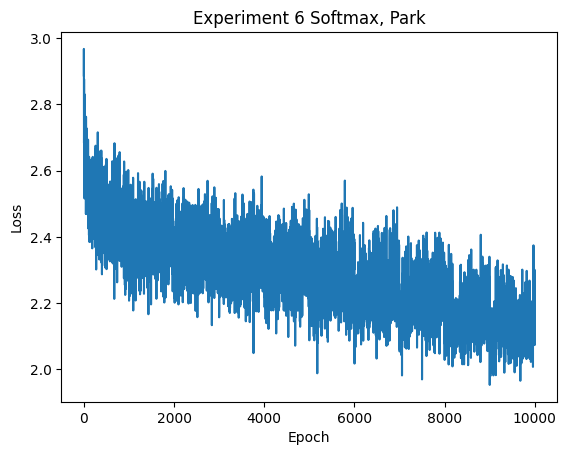

In [ ]:
experiment = 6
alpha = 0.01
epoch = 10000
reg = 0.01
batch = 1000
decay = True

softmax = Softmax(alpha, epoch, reg, batch, decay)
losses, val_acc, test_acc = softmax.train(X_train, y_train, X_val, y_val, X_test, y_test)
sns.lineplot(data=losses).set(title=f'Experiment {experiment} Softmax, Park', xlabel='Epoch', ylabel='Loss')
print(f'Alpha:{alpha}, Epoch:{epoch}, Reg:{reg}, Batch:{batch}, Decay:{decay}')

[Text(0.5, 1.0, 'Experiment 6 Softmax, Park'),
 Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Accuracy (%)')]

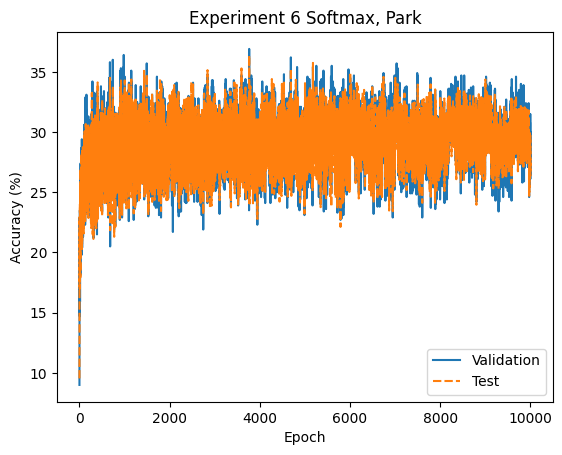

In [ ]:
sns.lineplot(data=pd.DataFrame({'Validation': val_acc, 'Test': test_acc})).set(title=f'Experiment {experiment} Softmax, Park', xlabel='Epoch', ylabel='Accuracy (%)')

In [ ]:
pred_softmax = softmax.predict(X_train)
print('The training accuracy is given by : %f' % (get_acc(pred_softmax, y_train)))

The training accuracy is given by : 34.534694


### Validate Softmax

In [ ]:
pred_softmax = softmax.predict(X_val)
print('The validation accuracy is given by : %f' % (get_acc(pred_softmax, y_val)))

The validation accuracy is given by : 27.700000


### Testing Softmax

In [ ]:
pred_softmax = softmax.predict(X_test)
print('The testing accuracy is given by : %f' % (get_acc(pred_softmax, y_test)))

The testing accuracy is given by : 28.840000


### Softmax Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Softmax. Use the following code to do so:

In [ ]:
output_submission_csv('softmax_submission.csv', softmax.predict(X_test))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-1a93386bb03a>", line 1, in <cell line: 1>
    output_submission_csv('softmax_submission.csv', softmax.predict(X_test))
  File "/content/gdrive/My Drive/CIVE 6358/Assignment 1/kaggle_submission.py", line 11, in output_submission_csv
    write_csv(output_file_path, y_test)
  File "/content/gdrive/My Drive/CIVE 6358/Assignment 1/kaggle_submission.py", line 6, in write_csv
    with open(file_path, 'w') as f:
OSError: [Errno 107] Transport endpoint is not connected: 'softmax_submission.csv'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object ha

# **Matrix Sizes**

In [ ]:
print(X_train.shape)
print(np.zeros((10, X_train.shape[1]), int).shape)
w = np.random.rand(10,np.shape(np.reshape(X_train[0],-1))[0])
print('weights:', w.shape)

pred = X_train@w.transpose()
print('pred:', pred.shape)
stable_pred = np.exp(pred - np.max(pred, axis=1, keepdims=True))
print('stable_pred:', stable_pred.shape)
softmax_pred = stable_pred / np.sum(stable_pred, axis=1, keepdims=True)
print('softmax_pred:', softmax_pred.shape)

one_hot = np.zeros(softmax_pred.shape)
one_hot[range(len(y_train)), y_train] = 1
print('one_hot:', one_hot.shape)

loss = (softmax_pred - one_hot)
print('loss:', loss.shape)
print('x_train:', X_train.shape)

grad = loss.transpose()@X_train
print('grad:', grad.shape)

avg_grad = grad / len(y_train)
print('avg_grad:', avg_grad.shape)

(49000, 3072)
(10, 3072)
weights: (10, 3072)
pred: (49000, 10)
stable_pred: (49000, 10)
softmax_pred: (49000, 10)
one_hot: (49000, 10)
loss: (49000, 10)
x_train: (49000, 3072)
grad: (10, 3072)
avg_grad: (10, 3072)


In [ ]:
# np.mean(np.array([[1,2],[3,4]]))
np.maximum(0, np.array([[1,-2],[-3,4]]))

array([[1, 0],
       [0, 4]])

In [ ]:
X = np.array([[1,2],[3,4]])
(np.exp(-X)/1+np.exp(-X))**2

array([[0.54134113, 0.07326256],
       [0.00991501, 0.00134185]])

In [ ]:
X = np.array([[1,2],[3,4]])
(np.exp(-X)/(1+np.exp(-X)))**2

array([[0.07232949, 0.01420934],
       [0.00224921, 0.0003235 ]])

In [19]:
z_1 = np.array([[1,-2],[3,-4]])

dz1 = z_1.copy()
dz1[z_1 < 0] = 0
print(dz1)

[[1 0]
 [3 0]]


In [17]:
dz2 = np.array([[1,-2],[3,-4]]).copy()
np.maximum(0, dz2)

array([[1, 0],
       [3, 0]])